### EXERCISE 09.1

In the ninth lesson of laboratory has been talked about optimization's algorithms. In particular in this exercise, has been requested, to solve the traveling salesman problem with a genetic algorithm. To solve the problem, the algorithm was strcutured in a class.

### How the genetic algorithm was built

The idea behind the algorithm is to build a class constituted of 100 organisms, where each organism is, initially, a random configuration of the path. Afterwords the population must generates new offspring, that with probability 30% is equal to the old offspring and with probability 70% crosses over. 

**what does crossing over mean?**
After having ordered the population by minimizing a parameter that for now it can be called fitness, 2 organism are chosen extracting an index like  $ind=int(N\text{r}^p$), where r is a random number extracted uniformly in the interval $[0,1]$. If the algorithm calls the function **Crossover**, the two organisms chosen, that can be called parents, generate other two organisms that are identical for a part of the path to one of the parents and, for the other part of the path, are filled with the missing cities in the same order that appear in the other parent.

The **Constructor** of the class needs the number of the city that the salesman must go across, the number of the organism presented in the population and the coordinates of the cities. It inizializes the population to a random configuratons of path and, afterwords, calculate the fitness of each organism of the population.

The **NewGeneration** method generates a new offspring. As explained above, with 70% probability is called a crossover function that generates two new organisms, with 30% of probability are selected two old organisms (following the same probability distribution explained upon). The 2 organisms are used to populate a new generation. When the number of organsims is saturated, the new population sobstitutes the old one.

The **Mutation** operator is a method that for every organisms calls 2 other operators with a certain probability $P=10$. Each operator implements a mixing (mutation) in the genetic code (i.e. the configuration of the path). Indeed the organism has 81% of probability to not mutate, 18% of probability to undergo just one muation, and 1% of probability to undergo two mutations. As shown in the following lines:

$P(NO-MUTATIONS) = 0.9 * 0.9 = 0.81$
$P(ONE-MUTATION) = 0.9 * 0.1 + 0.1 * 0.9 = 0.18$
$P(TWO-MUTATIONs) = 0.1 * 0.1 = 0.01$



The first mutation operator is the **Inversion** that, chosen a starting point in the path of the organism and, chosen a legthness of the genetic code, it invertes the cities.
The second mutation operator is the **Permutaion** that, chosen a starting point in the path of the organism and, chosen a legthness of the genetic code, it permutates the cities.

In the main there is just a constructor and a cycle for, in which are called, at every steps, the **NewGeneration** and the **Mutation** operators.

The fitness is the parameter that must be optimized (minimized) and for the problem of the salesman traveler is a good choice utilize the $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ norm of the path.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Ii has been used a particular map found
[here](https://stackoverflow.com/questions/14720331/how-to-generate-random-colors-in-matplotlib) to plot nicers figures.

In [2]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

### CITIES ON THE CYRCLE:

The first part of the excercise is to find the best path for cities extracted on randomly on a cyrcle of radius $R=10$.

In [3]:
BestPath_Length2_cyrcle = np.loadtxt(fname = "BestPath_Length2_cyrcle_GA.txt")
BestHalf_Length2_cyrcle = np.loadtxt(fname = "BestHalf_Length2_cyrcle.txt")
BestPath_cyrcle = np.loadtxt(fname = "BestPath_cyrcle_GA.txt")
x_coordinates_cyrcle = np.loadtxt(fname = "coordinates_cyrcle.txt",usecols=0)
y_coordinates_cyrcle = np.loadtxt(fname = "coordinates_cyrcle.txt",usecols=1)

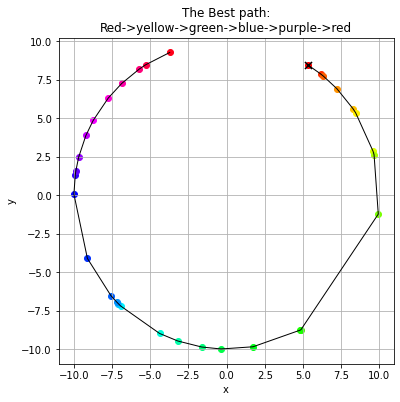

In [4]:
N=32 #Number of cities
x = np.arange(N) 
path=np.zeros((N,2))
for i in range (N):
    path[i][0] = x_coordinates_cyrcle[ int(BestPath_cyrcle[i]-1) ]
    path[i][1] = y_coordinates_cyrcle[ int(BestPath_cyrcle[i]-1) ]
    
plt.figure(figsize=(6,6))
cmap = get_cmap(len(path))
for i in range(N):
    plt.scatter(path[i][0], path[i][1], color=cmap(i))


#first point
plt.scatter(path[0][0], path[0][1], marker = 'x',color="black",s=50)
#path:
plt.plot(path[:,0],path[:,1],color="black",lw=1)
plt.title("The Best path:\nRed->yellow->green->blue->purple->red")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)



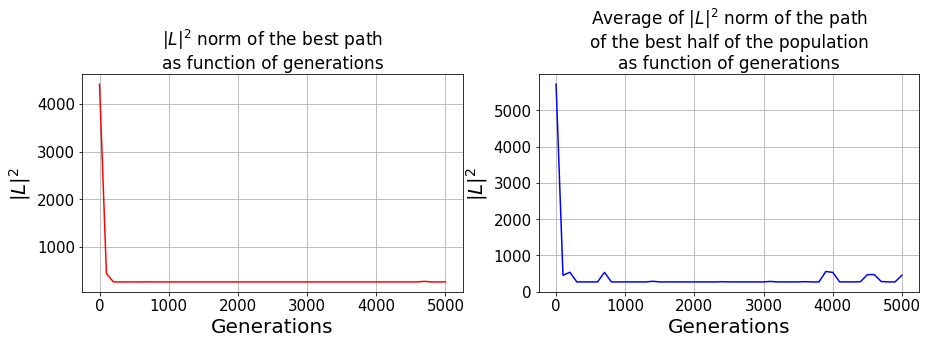

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
M=5000 #Number of generations
L=100  #Number generations before print
N=int(M/L) #Number of prints
x = np.arange(N+1)*L

ax1.plot(x,
         BestPath_Length2_cyrcle, 
         color='red'
        )

ax1.grid(True)
# add labels for axes
ax1.set_ylabel(f'$|L|^2$',fontsize=20)
ax1.set_xlabel(f'Generations',fontsize=20)
ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelsize=15)
#print(BestPath_Length2_cyrcle[2])


# add title
ax1.set_title(f'$|L|^2$ norm of the best path\nas function of generations',  fontsize=17);

ax2.plot(x,
         BestHalf_Length2_cyrcle, 
         color='blue'
        )

ax2.grid(True)
# add labels for axes
ax2.set_ylabel(f'$|L|^2$',fontsize=20)
ax2.set_xlabel(f'Generations',fontsize=20)
ax2.tick_params(axis="x", labelsize=15)
ax2.tick_params(axis="y", labelsize=15)

# add title
ax2.set_title(f'Average of $|L|^2$ norm of the path\nof the best half of the population\nas function of generations',  fontsize=17);


After 300 generations the length of the best path converges. For cities put on the cyrcle is easy realize that the path optimized is the best possible, indeed it is a proof of the effectiveness of the algorithm.

As can be expected by a genetic method, the best value of the fitness can draw aside from the minimum due to the mutations operator. This fact, characteristic of all genetic algorithms, is marked in the trend of the average of the fitness of the best half of the population, where the frequencies of the drops is higher than the frequency of the drops that are visible in the graph of the fitness of the best path only. 

### CITIES ON THE SQUARE:

The second part of the excercise is to find the best path for cities extracted  randomly in a square of side $L=10$.

In [6]:
BestPath_Length2_square = np.loadtxt(fname = "BestPath_Length2_square_GA.txt")
BestHalf_Length2_square = np.loadtxt(fname = "BestHalf_Length2_square.txt")
BestPath_square = np.loadtxt(fname = "BestPath_square_GA.txt")
x_coordinates_square = np.loadtxt(fname = "coordinates_square.txt",usecols=0)
y_coordinates_square = np.loadtxt(fname = "coordinates_square.txt",usecols=1)

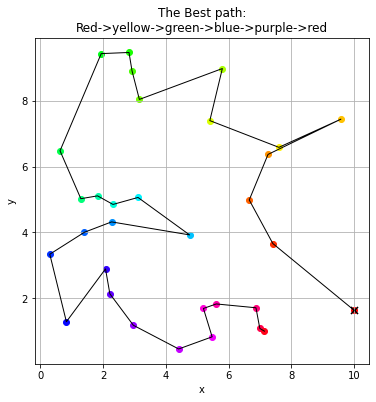

In [7]:
N=32 #Number of cities
x = np.arange(N) 
path=np.zeros((N,2))
for i in range (N):
    path[i][0] = x_coordinates_square[ int(BestPath_square[i]-1) ]
    path[i][1] = y_coordinates_square[ int(BestPath_square[i]-1) ]
    
plt.figure(figsize=(6,6))
cmap = get_cmap(len(path))
for i in range(N):
    plt.scatter(path[i][0], path[i][1], color=cmap(i))

#first point
plt.scatter(path[0][0], path[0][1], marker = 'x',color="black",s=50)
#path:
plt.plot(path[:,0],path[:,1],color="black",lw=1)
plt.title("The Best path:\nRed->yellow->green->blue->purple->red")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

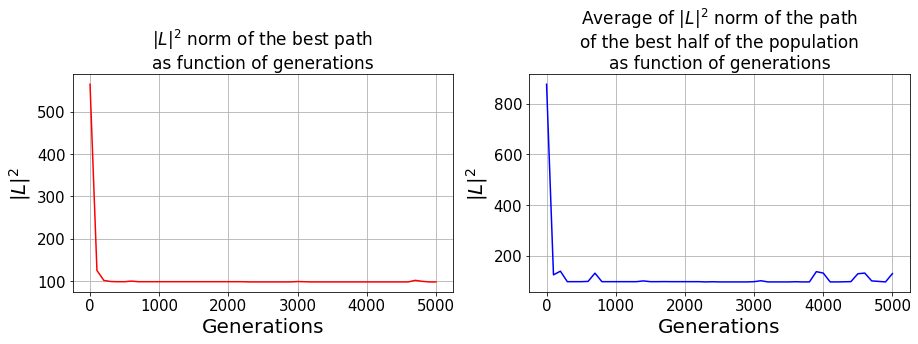

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
M=5000 #Number of generations
L=100  #Number steps before print
N=int(M/L) #Number of prints
x = np.arange(N+1)*L

ax1.plot(x,
         BestPath_Length2_square, 
         color='red'
        )

ax1.grid(True)
# add labels for axes
ax1.set_ylabel(f'$|L|^2$',fontsize=20)
ax1.set_xlabel(f'Generations',fontsize=20)
ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelsize=15)
#print(BestPath_Length2_square[22])


# add title
ax1.set_title(f'$|L|^2$ norm of the best path\nas function of generations',  fontsize=17);

ax2.errorbar(x,
         BestHalf_Length2_square, 
         color='blue'
        )

ax2.grid(True)
# add labels for axes
ax2.set_ylabel(f'$|L|^2$',fontsize=20)
ax2.set_xlabel(f'Generations',fontsize=20)
ax2.tick_params(axis="x", labelsize=15)
ax2.tick_params(axis="y", labelsize=15)

# add title
ax2.set_title(f'Average of $|L|^2$ norm of the path\nof the best half of the population\nas function of generations',  fontsize=17);




When the cities are placed inside the square the algorithm is slower in the convergence. After 2300 generations the length of the best path converges. Even in the square are visibile the characteristic drops of the length of the path as function of the number of evolutions.